## Shifted Sphere (F1) with Dimension 50

In [2]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import time

In [3]:
dataset = pd.read_csv("sphere_dataset_data.csv")
sphere_dataset = dataset["val"].tolist()

In [4]:
Dims = 50
bias = -450
lower_bound = -100
upper_bound = 100
solution_list = []

In [5]:
# Shifted Sphere Function as given in the cec2008 tech report
def define_function(x, data=sphere_dataset, dim=Dims, f_bias=bias):
    Function = 0
    for i in range(dim - 1):
        z = x[i] - data[i]
        Function += z**2
    result = Function + f_bias
    return result

In [6]:
# Solution Compiler
def solution_set(allsol):
    solution_result = define_function(allsol)
    solution_list.append(solution_result)
    return solution_result

In [7]:
# Solution Computer
def compute_solution(dimension, lower_bound, upper_bound):
    global sol
    xmin = lower_bound * np.ones(dimension)
    xmax = upper_bound * np.ones(dimension)
    x0 = np.random.uniform(min(xmin), max(xmax), dimension)
    
    # Minimizing the function using BFGS algorithm (Scipy)
    sol = minimize(solution_set, x0, bounds=(lower_bound, upper_bound), method='BFGS', callback=solution_set)
    return sol, solution_list

In [8]:
# Initial Time
start_time = time.time()

In [9]:
# computing the problem
compute_solution(Dims, lower_bound, upper_bound)

d:\anaconda\anacondacore\envs\mytfenv\lib\site-packages\scipy\optimize\_minimize.py:534: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)


(      fun: -449.99999999979127
  hess_inv: array([[ 0.98954324, -0.01414909, -0.00175205, ..., -0.0034441 ,
         -0.01397341,  0.        ],
        [-0.01414909,  0.95976404,  0.00559675, ...,  0.00157029,
         -0.02998106,  0.        ],
        [-0.00175205,  0.00559675,  0.99669657, ..., -0.00293077,
          0.00184199,  0.        ],
        ...,
        [-0.0034441 ,  0.00157029, -0.00293077, ...,  0.99702505,
         -0.00133107,  0.        ],
        [-0.01397341, -0.02998106,  0.00184199, ..., -0.00133107,
          0.97551316,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  1.        ]])
       jac: array([ 3.81469727e-06,  3.81469727e-06,  3.81469727e-06,  3.81469727e-06,
        -3.81469727e-06,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         3.81469727e-06,  3.81469727e-06,  0.00000000e+00,  3.81469727e-06,
         7.62939453e-06,  3.81469727e-06,  0.00000000e+00,  0.00000000e+00,
         0.00000

In [10]:
# End Time and computing time
end_time = time.time()
computation_time = end_time - start_time

In [11]:
# Displaying Parameters and Insights
print("Function_Name: Shifted sphere\n")
print("01. Chosen algorithm: BFGS (SciPy)\n")
print("02. Parameters of the Algorithm:")
print("\nDimension:", Dims)
print("\nLower and Upper Bounds: [", lower_bound, ",", upper_bound, "]")
print("\nBias:", bias)
print("\n03. Result:")
print("\n    - Solutions:", sol_df)
print("\n    - Fitness:", round(sol.fun, 2))
print("\nNumber of function evaluations:", sol.nfev)
print("\nStopping criterion:", sol.nit, "iterations")
print("\nComputational time:", round(computation_time, 2), "seconds\n")


Function: Shifted sphere_dataset Function (F1)

01. Chosen algorithm: BFGS from SciPy

02. Parameters:

Dimension: 50

Lower and Upper Bounds: [ -100 , 100 ]

Bias: -450

03. Result:

    - Solutions:              
0   97.249938
1   77.060988
2  -19.031147
3   25.428701
4  -22.908803
5   69.572176
6    5.369714
7   61.480732
8  -21.300696
9   92.346815
10 -93.975880
11  90.745990
12  42.876984
13  29.309650
14 -10.669548
15 -65.074616
16  67.049418
17  94.018771
18 -73.005020
19 -49.802196
20  82.001427
21  35.293184
22  24.632151
23   2.443141
24 -99.303451
25 -54.622336
26  95.691460
27  72.250481
28 -97.122951
29  -2.844625
30 -16.719405
31  54.580484
32  -2.370491
33   4.512915
34  56.409888
35  18.245870
36 -74.721444
37 -78.056146
38  32.581077
39  99.418624
40 -30.763808
41 -64.789094
42 -86.422207
43 -38.120822
44 -33.048036
45 -24.766484
46  90.441369
47  43.864103
48  55.868489
49 -10.232637

    - Fitness: -450.0

Number of function evaluations: 510

Stopping criterion: 5 it

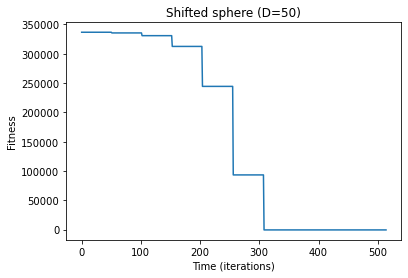

In [14]:
# Plotting function
def fitness_curve(solution):
    plt.plot(solution)
    plt.title("Shifted sphere (D=50)")
    plt.xlabel("Time (iterations)")
    plt.ylabel("Fitness")
    plt.show()
fitness_curve(solution_list)